In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
d_icd = pd.read_csv("DIAGNOSES_ICD.csv")  # contains the icd codes with the corresponding patients
d_icd_all = pd.read_csv("DIAGNOSES_ICD.csv")  
icd_names = pd.read_csv("D_ICD_DIAGNOSES.csv")  # contains the icd codes with the corresponging name of the codes

In [3]:
# all ICD 9 Codes related with Type 1 Diabetes, manually extracted 
ICD_9_Codes = ["25001", "25003", "25011", "25013", "25021", "25023", "25031", "25033", "25041", "25043", "25051", "25053", "25061", "25063", "25071", "25073", "25081", "25083", "25091", "25093"]

In [4]:
# checking if ICD_9_Codes of Type 1 Diabetes are represented among the patients and storing those in a numpy array
d_icd = d_icd[d_icd['ICD9_CODE'].isin(ICD_9_Codes)]
subject_ID_all = d_icd['SUBJECT_ID'].to_numpy()
len(np.unique(subject_ID_all))

998


https://stackoverflow.com/questions/26640129/search-for-string-in-all-pandas-dataframe-columns-and-filter

In [5]:
# string search algorithm in a dataframe
def search(regex: str, df, case=False):
    textlikes = df.select_dtypes(include=[object, "string"])
    return df[
        textlikes.apply(
            lambda column: column.str.contains(regex, regex=True, case=case, na=False)
        ).any(axis=1)
    ]

In [10]:
# extracting all type 1 diabetes realted patients from their discharge summary text documents if T1DM related words appear
df = pd.read_csv('glc_insulin_dischargenotes_df.csv')  # read the file with the discharge summaries per patient as a dataframe
df = df[['SUBJECT_ID', 'TEXT']]  # only store the text column and the subject id
df.drop_duplicates(subset=['SUBJECT_ID'],inplace = True)  # drop duplucates

df_T1DM = search("Diabetes Mellitus Type 1", df)
df_T1DM.reset_index(inplace=True)
df_T1DM = df_T1DM.drop('index', axis = 1)

df_T1DM_3 = search("T1DM", df)
df_T1DM_3.reset_index(inplace=True)
df_T1DM_3 = df_T1DM_3.drop('index', axis = 1)

df_T1DM_5 = search("DM1", df)
df_T1DM_5.reset_index(inplace=True)
df_T1DM_5 = df_T1DM_5.drop('index', axis = 1)

df_list1 = [df_T1DM, df_T1DM_3, df_T1DM_5]   
df_all_T1DMs = pd.concat(df_list1, ignore_index=True) # concataneate all identified patients
df_all_T1DMs.sort_values("SUBJECT_ID", inplace=True)  # sort according to the subject id

df_all_T1DMs.drop_duplicates(subset=['SUBJECT_ID'],inplace = True)  # and drop the duplicate values
df_all_T1DMs.reset_index(inplace=True)  # remove the index
df_all_T1DMs = df_all_T1DMs.drop('index', axis = 1)  # remove the index
df_all_T1DMs

array([ 1493,  1900,  2045,  3952,  4308,  4313,  5124,  5867,  6179,
        6534,  7299,  8452,  8799, 11229, 11242, 11861, 12709, 13214,
       13731, 15485, 16076, 18187, 20747, 20931, 21399, 22122, 23039,
       23197, 25329, 25941, 26161, 26661, 26996, 27643, 27694, 27905,
       28067, 28192, 29411, 30707, 30962, 32035, 32195, 41982, 42155,
       42217, 42776, 42920, 42948, 43724, 44166, 44377, 44566, 45791,
       47287, 48340, 49552, 51484, 52631, 52967, 53897, 54132, 55973,
       56405, 58163, 59133, 59848, 61551, 62061, 62681, 65007, 65232,
       66079, 66109, 66898, 67624, 68401, 69518, 69624, 70355, 70382,
       70386, 70499, 71211, 71336, 71525, 71728, 71880, 72421, 73874,
       75496, 77892, 78536, 78968, 79931, 80281, 82512, 82598, 83099,
       83156, 83564, 85566, 85685, 86765, 87708, 88594, 90884, 91249,
       91384, 93638, 93893, 95599, 96057, 96686, 98438, 99260, 99650])

In [9]:
# extract all type 1 diabetes patients with the computed array from the dataframe containing all pateints and convert is to a numpy array
subject_IDs = df_all_T1DMs['SUBJECT_ID'].to_numpy()  
subject_IDs

NameError: name 'df_all_T1DMs' is not defined

In [7]:
# store all type 1 diabetes patients extracted from the icd 9 codes 
diabets = d_icd[d_icd['SUBJECT_ID'].isin(subject_ID_all)]

In [8]:
diabets.drop_duplicates(subset=['SUBJECT_ID'],inplace = True)

In [9]:
u = np.unique(subject_ID_all) # extracted from icd9 codes
z = np.unique(subject_IDs) # from text mining

In [10]:
y = np.append(u,z) # both together

In [11]:
all_subjects = np.unique(y)  # remove duplicates

In [12]:
len(all_subjects)

1008

In [13]:
only_d = d_icd_all[d_icd_all['SUBJECT_ID'].isin(all_subjects)] # extract all icd codes of those pateints

In [14]:
only_codes = np.unique(only_d["ICD9_CODE"].to_numpy())  # store only the icd codes in a numpy array

In [15]:
# add the corresponding disease names to the icd 9 codes
icd_diabetes_names = pd.merge(only_d, icd_names, on = "ICD9_CODE", how = "inner")

In [16]:
icd_diabetes_names

,ROW_ID_x,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ROW_ID_y,SHORT_TITLE,LONG_TITLE
0,180,25,129635,1.0,41071,4357,"Subendo infarct, initial","Subendocardial infarction, initial episode of ..."
1,2831,234,134944,1.0,41071,4357,"Subendo infarct, initial","Subendocardial infarction, initial episode of ..."
2,2845,234,188399,1.0,41071,4357,"Subendo infarct, initial","Subendocardial infarction, initial episode of ..."
3,3813,323,192631,1.0,41071,4357,"Subendo infarct, initial","Subendocardial infarction, initial episode of ..."
4,11624,998,166191,1.0,41071,4357,"Subendo infarct, initial","Subendocardial infarction, initial episode of ..."
...,...,...,...,...,...,...,...,...
25253,641822,97924,186334,1.0,55011,6150,Recur unil ing hern-obst,"Inguinal hernia, with obstruction, without men..."
25254,641832,97924,186334,11.0,3897,4541,"Deaf, nonspeaking NEC","Deaf, nonspeaking, not elsewhere classifiable"
25255,632797,96057,189101,6.0,73004,13834,Ac osteomyelitis-hand,"Acute osteomyelitis, hand"
25256,637116,96920,191721,7.0,75989,7884,Specfied cong anomal NEC,Other specified congenital anomalies


Remove columns which are not significant and clean dataframe

In [17]:
icd_diabetes_names = icd_diabetes_names.drop('ROW_ID_y', axis = 1)

In [18]:
icd_diabetes_names = icd_diabetes_names.drop('ROW_ID_x', axis = 1)

In [19]:
icd_diabetes_names

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,25,129635,1.0,41071,"Subendo infarct, initial","Subendocardial infarction, initial episode of ..."
1,234,134944,1.0,41071,"Subendo infarct, initial","Subendocardial infarction, initial episode of ..."
2,234,188399,1.0,41071,"Subendo infarct, initial","Subendocardial infarction, initial episode of ..."
3,323,192631,1.0,41071,"Subendo infarct, initial","Subendocardial infarction, initial episode of ..."
4,998,166191,1.0,41071,"Subendo infarct, initial","Subendocardial infarction, initial episode of ..."
...,...,...,...,...,...,...
25253,97924,186334,1.0,55011,Recur unil ing hern-obst,"Inguinal hernia, with obstruction, without men..."
25254,97924,186334,11.0,3897,"Deaf, nonspeaking NEC","Deaf, nonspeaking, not elsewhere classifiable"
25255,96057,189101,6.0,73004,Ac osteomyelitis-hand,"Acute osteomyelitis, hand"
25256,96920,191721,7.0,75989,Specfied cong anomal NEC,Other specified congenital anomalies


In [29]:
# dictionary for giving the icd 9 codes unique identifyers, having the length of all possible codes in the dataframe
data = {} 
n = 0
for i in only_codes:
    data[i] = n
    n = n + 1

In [30]:
# we want to group the icd 9 codes, hence, each code needs an identifying number since the original codes are strings
icd_diabetes_names["NUMB"] = icd_diabetes_names["ICD9_CODE"].apply(lambda x: data.get(x))

In [31]:
icd_diabetes_names

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,SHORT_TITLE,LONG_TITLE,NUMB
0,25,129635,1.0,41071,"Subendo infarct, initial","Subendocardial infarction, initial episode of ...",637
1,234,134944,1.0,41071,"Subendo infarct, initial","Subendocardial infarction, initial episode of ...",637
2,234,188399,1.0,41071,"Subendo infarct, initial","Subendocardial infarction, initial episode of ...",637
3,323,192631,1.0,41071,"Subendo infarct, initial","Subendocardial infarction, initial episode of ...",637
4,998,166191,1.0,41071,"Subendo infarct, initial","Subendocardial infarction, initial episode of ...",637
...,...,...,...,...,...,...,...
25253,97924,186334,1.0,55011,Recur unil ing hern-obst,"Inguinal hernia, with obstruction, without men...",969
25254,97924,186334,11.0,3897,"Deaf, nonspeaking NEC","Deaf, nonspeaking, not elsewhere classifiable",603
25255,96057,189101,6.0,73004,Ac osteomyelitis-hand,"Acute osteomyelitis, hand",1324
25256,96920,191721,7.0,75989,Specfied cong anomal NEC,Other specified congenital anomalies,1374


In [32]:
# Grouping them according to the British Columbian website

icd_diabetes_names['ICD9_GROUP'] = pd.cut(icd_diabetes_names['NUMB'], bins= [0, 98, 182, 195, 262, 325, 379, 476, 571, 625, 638, 646, 662, 872, 967, 1138, 1164, 1193, 1202, 1204, 1223, 1251, 1317, 1445, 1464, 1470, 1594, 1822, 1944, 2140], 
                                                                            labels=['INFECTIONS', 
                                                                                    'NEOPLASMS', 
                                                                                    'DISORDERS OF THYROID GLAND',
                                                                                    'DISEASES OF ENDOCRINE GLANDS',
                                                                                    'NUTRITIONAL, METABOLIC DISEASE AND IMMUNITY DISORDERS', 
                                                                                    'DISEAESE OF BLOOD', 
                                                                                    'MENTAL DISORDERS', 
                                                                                    'DISEASES OF NERVOUS SYSTEM', 
                                                                                    'DISORDERS OF THE EYE',
                                                                                    'DISORDERS OF EAR AND MASTOID PROCESS',
                                                                                    'DISEASES OF CIRCULATORY SYSTEM', 
                                                                                    'HYPERTENSION',
                                                                                    'DISEASES OF CIRCULATORY SYSTEM2', 
                                                                                    'DISEASES OF THE RESPIRATORY SYSTEM', 
                                                                                    'DISEASES OF THE DIGESTIVE SYSTEM',
                                                                                    'NEPHRITIS, NEPHROTIC SYNDROME ANS NEPHROSIS',
                                                                                    'DISEASES OF THE URINARY SYSTEM',
                                                                                    'DISEASES OF THE M GENITAL ORGANS',
                                                                                    'DISORDERS OF THE BREAST',
                                                                                    'DISORDERS OF F GENITAL TRACT', 
                                                                                    'COMPLICATIONS OF PREGNANCY, CHILDBIRTH AND THE PUERPERIUM', 
                                                                                    'DISEASES OF THE SKIN/TISSUE', 
                                                                                    'DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE', 
                                                                                    'CONGENITAL ANOMALIES', 
                                                                                    'CERTAIN CONDITIONS ORIGINATING IN THE PERINATAL PERIOD', 
                                                                                    'SYMPTOMS, SIGNS AND ILL-DEFINED CONDITIONS', 
                                                                                    'INJURY/POISONING', 
                                                                                    'ADDITIONAL COMPLICATIONS', 
                                                                                    'SUPPLEMENTARY FACTORS INFLUENCING HEALTH STATUS AND CONTACT WITH HEALTH SERVICES'])

In [33]:
# since hypertension was defined as a seperate group, the two diseases of circulatory system need to be combined again (the icd codes of hypertensiopn were between both)
icd_diabetes_names=icd_diabetes_names.replace('DISEASES OF CIRCULATORY SYSTEM2','DISEASES OF CIRCULATORY SYSTEM')

In [34]:
icd_diabetes_names

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,SHORT_TITLE,LONG_TITLE,NUMB,ICD9_GROUP
0,25,129635,1.0,41071,"Subendo infarct, initial","Subendocardial infarction, initial episode of ...",637,DISORDERS OF EAR AND MASTOID PROCESS
1,234,134944,1.0,41071,"Subendo infarct, initial","Subendocardial infarction, initial episode of ...",637,DISORDERS OF EAR AND MASTOID PROCESS
2,234,188399,1.0,41071,"Subendo infarct, initial","Subendocardial infarction, initial episode of ...",637,DISORDERS OF EAR AND MASTOID PROCESS
3,323,192631,1.0,41071,"Subendo infarct, initial","Subendocardial infarction, initial episode of ...",637,DISORDERS OF EAR AND MASTOID PROCESS
4,998,166191,1.0,41071,"Subendo infarct, initial","Subendocardial infarction, initial episode of ...",637,DISORDERS OF EAR AND MASTOID PROCESS
...,...,...,...,...,...,...,...,...
25253,97924,186334,1.0,55011,Recur unil ing hern-obst,"Inguinal hernia, with obstruction, without men...",969,DISEASES OF THE DIGESTIVE SYSTEM
25254,97924,186334,11.0,3897,"Deaf, nonspeaking NEC","Deaf, nonspeaking, not elsewhere classifiable",603,DISORDERS OF THE EYE
25255,96057,189101,6.0,73004,Ac osteomyelitis-hand,"Acute osteomyelitis, hand",1324,DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CON...
25256,96920,191721,7.0,75989,Specfied cong anomal NEC,Other specified congenital anomalies,1374,DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CON...


In [35]:
# now we only need the icd groups and subject ids
NEW_SUBJECTS = icd_diabetes_names[['SUBJECT_ID', 'ICD9_GROUP']]

In [36]:
NEW_SUBJECTS

,SUBJECT_ID,ICD9_GROUP
0,25,DISORDERS OF EAR AND MASTOID PROCESS
1,234,DISORDERS OF EAR AND MASTOID PROCESS
2,234,DISORDERS OF EAR AND MASTOID PROCESS
3,323,DISORDERS OF EAR AND MASTOID PROCESS
4,998,DISORDERS OF EAR AND MASTOID PROCESS
...,...,...
25253,97924,DISEASES OF THE DIGESTIVE SYSTEM
25254,97924,DISORDERS OF THE EYE
25255,96057,DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CON...
25256,96920,DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CON...


In [37]:
# Remove Groups of Diseases which are only represented by single or few individuums
NEW_SUBJECTS=NEW_SUBJECTS.replace('ADDITIONAL COMPLICATIONS',np.nan)
NEW_SUBJECTS=NEW_SUBJECTS.replace('SUPPLEMENTARY FACTORS INFLUENCING HEALTH STATUS AND CONTACT WITH HEALTH SERVICES', np.nan)
NEW_SUBJECTS=NEW_SUBJECTS.replace('SYMPTOMS, SIGNS AND ILL-DEFINED CONDITIONS', np.nan)
NEW_SUBJECTS=NEW_SUBJECTS.replace('SYMPTOMS, SIGNS AND ILL-DEFINED CONDITIONS', np.nan)
NEW_SUBJECTS=NEW_SUBJECTS.replace('DISORDERS OF EAR AND MASTOID PROCESS', np.nan)
NEW_SUBJECTS=NEW_SUBJECTS.replace('DISORDERS OF THE BREAST', np.nan) 
NEW_SUBJECTS=NEW_SUBJECTS.replace('CERTAIN CONDITIONS ORIGINATING IN THE PERINATAL PERIOD', 'COMPLICATIONS OF PREGNANCY OR CHILDBIRTH') 
NEW_SUBJECTS=NEW_SUBJECTS.replace('COMPLICATIONS OF PREGNANCY, CHILDBIRTH AND THE PUERPERIUM', 'COMPLICATIONS OF PREGNANCY OR CHILDBIRTH') 

In [38]:
NEW_SUBJECTS = NEW_SUBJECTS.dropna()  #  remove nan values which were defined in the cell before

In [39]:
NEW_SUBJECTS = NEW_SUBJECTS.sort_values("SUBJECT_ID") # sort according to the subject ids
NEW_SUBJECTS

,SUBJECT_ID,ICD9_GROUP
183,25,DISORDERS OF THYROID GLAND
878,25,DISORDERS OF THE EYE
387,25,HYPERTENSION
184,141,DISORDERS OF THYROID GLAND
2744,141,INJURY/POISONING
...,...,...
16567,99650,DISEAESE OF BLOOD
21423,99650,DISEASES OF CIRCULATORY SYSTEM
7110,99928,DISORDERS OF THYROID GLAND
2034,99928,DISEASES OF ENDOCRINE GLANDS


In [41]:
# explore the data and see each comorbiditiy as a list 
dfs = NEW_SUBJECTS.groupby(["SUBJECT_ID"])["ICD9_GROUP"].unique() 
dfs

SUBJECT_ID
25       ['DISORDERS OF THYROID GLAND', 'DISORDERS OF T...
141      ['DISORDERS OF THYROID GLAND', 'INJURY/POISONI...
192      ['COMPLICATIONS OF PREGNANCY OR CHILDBIRTH', '...
234      ['DISEAESE OF BLOOD', 'DISEASES OF THE MUSCULO...
263      ['DISEASES OF ENDOCRINE GLANDS', 'DISEASES OF ...
                               ...                        
99294    ['DISEASES OF NERVOUS SYSTEM', 'DISEASES OF TH...
99383    ['DISEASES OF NERVOUS SYSTEM', 'DISEASES OF CI...
99444    ['DISEASES OF THE SKIN/TISSUE', 'MENTAL DISORD...
99650    ['DISORDERS OF THE EYE', 'DISEASES OF THE RESP...
99928    ['DISORDERS OF THYROID GLAND', 'DISEASES OF EN...
Name: ICD9_GROUP, Length: 1008, dtype: object

In [42]:
# count how many comorbiditites each subject has
NEW_SUBJECTS.groupby(["SUBJECT_ID"])["ICD9_GROUP"].nunique()

SUBJECT_ID
25        3
141       5
192       5
234      11
263       6
         ..
99294     5
99383    13
99444     9
99650    13
99928     3
Name: ICD9_GROUP, Length: 1008, dtype: int64

In [43]:
nfs = NEW_SUBJECTS.copy()
nfs.drop_duplicates(subset=["SUBJECT_ID", "ICD9_GROUP"], inplace = True)
nfs

,SUBJECT_ID,ICD9_GROUP
183,25,DISORDERS OF THYROID GLAND
878,25,DISORDERS OF THE EYE
387,25,HYPERTENSION
184,141,DISORDERS OF THYROID GLAND
2744,141,INJURY/POISONING
...,...,...
9665,99650,DISEASES OF NERVOUS SYSTEM
16567,99650,DISEAESE OF BLOOD
7110,99928,DISORDERS OF THYROID GLAND
2034,99928,DISEASES OF ENDOCRINE GLANDS


In [44]:
# count how many comorbiditites each subject has
nfs.groupby(["SUBJECT_ID"])["ICD9_GROUP"].count()

SUBJECT_ID
25        3
141       5
192       5
234      11
263       6
         ..
99294     5
99383    13
99444     9
99650    13
99928     3
Name: ICD9_GROUP, Length: 1008, dtype: int64

In [45]:
# compute the mean number of comorbidiites of all patients
(nfs.groupby(["SUBJECT_ID"])["ICD9_GROUP"].count()).mean()

8.212301587301587

In [46]:
ICD_grouped = nfs.groupby(["ICD9_GROUP"])["SUBJECT_ID"].count()
ICD_grouped

ICD9_GROUP
INFECTIONS                                                      369
NEOPLASMS                                                       254
DISORDERS OF THYROID GLAND                                      699
DISEASES OF ENDOCRINE GLANDS                                    711
NUTRITIONAL, METABOLIC DISEASE AND IMMUNITY DISORDERS           534
DISEAESE OF BLOOD                                               373
MENTAL DISORDERS                                                339
DISEASES OF NERVOUS SYSTEM                                      497
DISORDERS OF THE EYE                                            651
DISEASES OF CIRCULATORY SYSTEM                                  710
HYPERTENSION                                                    407
DISEASES OF THE RESPIRATORY SYSTEM                              531
DISEASES OF THE DIGESTIVE SYSTEM                                662
NEPHRITIS, NEPHROTIC SYNDROME ANS NEPHROSIS                      25
DISEASES OF THE URINARY SYSTEM       

## Plotting the distribution of Comorbidities

In [47]:
Plott = NEW_SUBJECTS.copy()

In [48]:
# group more comorbidities for better visualization and remove diseases present in only few patients
Plott = NEW_SUBJECTS.replace('DISEASES OF THE M GENITAL ORGANS', 'DISEASES OF THE URINARY SYSTEM/GENITAL TRACT') 
Plott = Plott.replace('NEPHRITIS, NEPHROTIC SYNDROME ANS NEPHROSIS', np.nan) 
Plott = Plott.replace('DISEASES OF THE URINARY SYSTEM', 'DISEASES OF THE URINARY SYSTEM/GENITAL TRACT') 
Plott = Plott.replace('DISORDERS OF F GENITAL TRACT', 'DISEASES OF THE URINARY SYSTEM/GENITAL TRACT')

In [49]:
Plott = Plott.dropna()
Plott = Plott.sort_values("SUBJECT_ID") 

In [50]:
Plott.drop_duplicates(subset=["SUBJECT_ID", "ICD9_GROUP"], inplace = True)

In [51]:
ICD_grouped1 = Plott.groupby(["ICD9_GROUP"])["SUBJECT_ID"].count()
ICD_grouped2 = ICD_grouped.sort_values()

<Axes: >

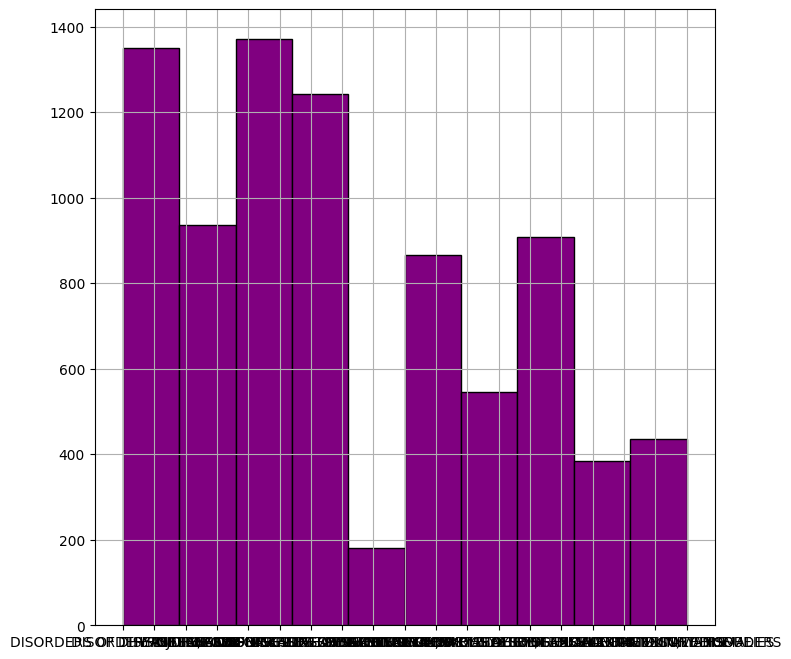

In [52]:
Plott["ICD9_GROUP"].hist(color='purple', edgecolor='black', figsize=(8, 8))


[]

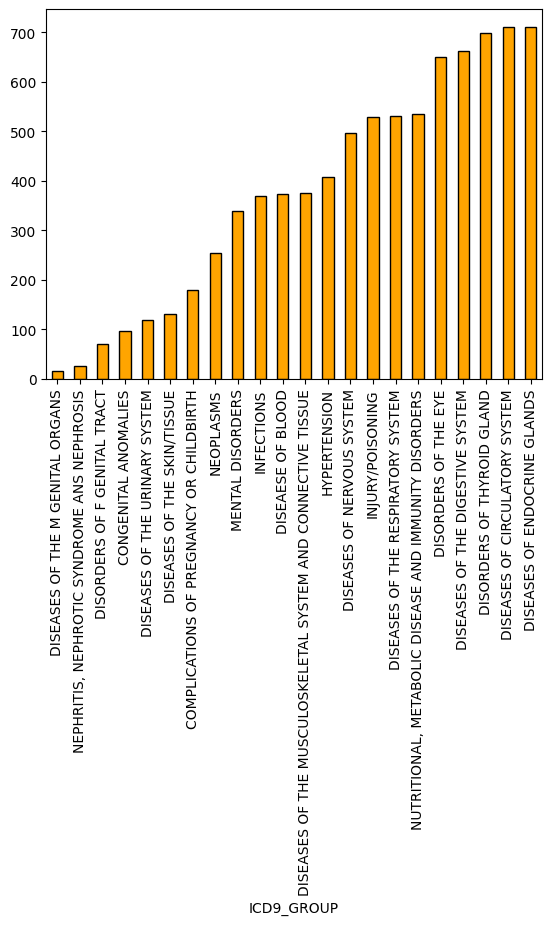

In [53]:
ICD_grouped2.plot(kind="bar", color='orange', edgecolor='black')
plt.plot()

<Axes: ylabel='SUBJECT_ID'>

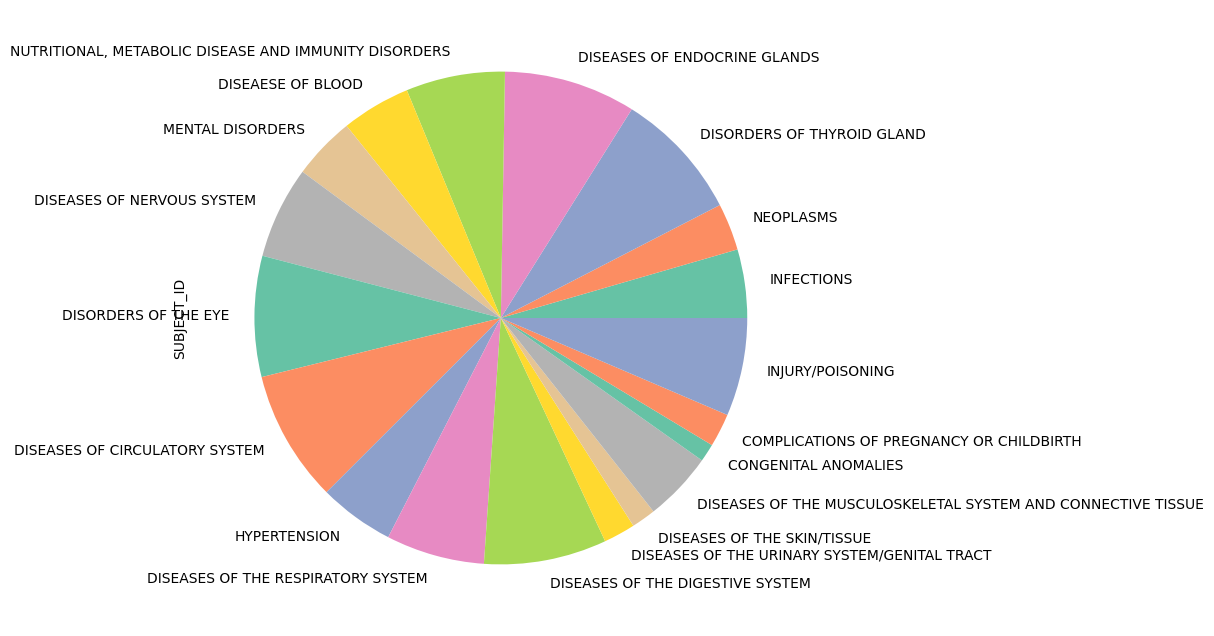

In [54]:
import seaborn as sns
ICD_grouped1.plot.pie(y='COMPLICATIONS',colors=sns.color_palette('Set2'), figsize=(8, 8))

In [55]:
# one hot encoding the dataframe so that every patient represents a row and every column a comorbiditiy group
df_onehot = pd.get_dummies(nfs['ICD9_GROUP'])
df = pd.concat([nfs['SUBJECT_ID'], df_onehot], axis = 1)  # combine the one hot encoded data with the subject id

In [56]:
df

,SUBJECT_ID,INFECTIONS,NEOPLASMS,DISORDERS OF THYROID GLAND,DISEASES OF ENDOCRINE GLANDS,"NUTRITIONAL, METABOLIC DISEASE AND IMMUNITY DISORDERS",DISEAESE OF BLOOD,MENTAL DISORDERS,DISEASES OF NERVOUS SYSTEM,DISORDERS OF THE EYE,...,DISEASES OF THE DIGESTIVE SYSTEM,"NEPHRITIS, NEPHROTIC SYNDROME ANS NEPHROSIS",DISEASES OF THE URINARY SYSTEM,DISEASES OF THE M GENITAL ORGANS,DISORDERS OF F GENITAL TRACT,DISEASES OF THE SKIN/TISSUE,DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE,CONGENITAL ANOMALIES,COMPLICATIONS OF PREGNANCY OR CHILDBIRTH,INJURY/POISONING
183,25,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
878,25,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
387,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184,141,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2744,141,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9665,99650,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16567,99650,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7110,99928,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2034,99928,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df.reset_index(inplace=True)

In [58]:
df = df.drop('index', axis = 1) # drop the false sorted index

In [59]:
df

,SUBJECT_ID,INFECTIONS,NEOPLASMS,DISORDERS OF THYROID GLAND,DISEASES OF ENDOCRINE GLANDS,"NUTRITIONAL, METABOLIC DISEASE AND IMMUNITY DISORDERS",DISEAESE OF BLOOD,MENTAL DISORDERS,DISEASES OF NERVOUS SYSTEM,DISORDERS OF THE EYE,...,DISEASES OF THE DIGESTIVE SYSTEM,"NEPHRITIS, NEPHROTIC SYNDROME ANS NEPHROSIS",DISEASES OF THE URINARY SYSTEM,DISEASES OF THE M GENITAL ORGANS,DISORDERS OF F GENITAL TRACT,DISEASES OF THE SKIN/TISSUE,DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE,CONGENITAL ANOMALIES,COMPLICATIONS OF PREGNANCY OR CHILDBIRTH,INJURY/POISONING
0,25,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,141,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,141,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8273,99650,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8274,99650,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8275,99928,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8276,99928,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df.describe()

,SUBJECT_ID,INFECTIONS,NEOPLASMS,DISORDERS OF THYROID GLAND,DISEASES OF ENDOCRINE GLANDS,"NUTRITIONAL, METABOLIC DISEASE AND IMMUNITY DISORDERS",DISEAESE OF BLOOD,MENTAL DISORDERS,DISEASES OF NERVOUS SYSTEM,DISORDERS OF THE EYE,...,DISEASES OF THE DIGESTIVE SYSTEM,"NEPHRITIS, NEPHROTIC SYNDROME ANS NEPHROSIS",DISEASES OF THE URINARY SYSTEM,DISEASES OF THE M GENITAL ORGANS,DISORDERS OF F GENITAL TRACT,DISEASES OF THE SKIN/TISSUE,DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE,CONGENITAL ANOMALIES,COMPLICATIONS OF PREGNANCY OR CHILDBIRTH,INJURY/POISONING
count,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,...,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000
mean,31086.903721,0.044576,0.030684,0.084441,0.085890,0.064508,0.045059,0.040952,0.060039,0.078642,...,0.079971,0.003020,0.014255,0.001812,0.008577,0.015825,0.045301,0.011718,0.021744,0.063904
std,26997.398813,0.206383,0.172470,0.278064,0.280219,0.245671,0.207447,0.198191,0.237573,0.269196,...,0.271265,0.054875,0.118546,0.042532,0.092219,0.124806,0.207976,0.107619,0.145857,0.244597
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10879.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22280.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48254.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99928.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.to_csv('Comorb.csv')  # save the preprocessed file as a csv file for further processing and combining with the age and gender data

## Feature Hasher

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.FeatureHasher.html

In [65]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [66]:
# feature hasher can handle inconsistent length of data and reduce its dimension, hence, does not need the one hot encoding
dfs = NEW_SUBJECTS.groupby(["SUBJECT_ID"])["ICD9_GROUP"].unique() # take a list of comorbidities for every patient

In [67]:
from sklearn.feature_extraction import FeatureHasher

h = FeatureHasher(n_features=2, input_type="string")
raw_X = dfs
f = h.transform(raw_X)
f.toarray()

array([[ 1.,  0.],
       [ 3.,  2.],
       [ 0.,  1.],
       ...,
       [ 3.,  2.],
       [ 1.,  2.],
       [ 0., -1.]])

In [68]:
h = FeatureHasher(n_features=2, input_type="string")
raw_X = dfs
f = h.transform(raw_X)
data = f.toarray()

Initialization complete
Iteration 0, inertia 6628.0.
Iteration 1, inertia 3354.339285714285.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4822.0.
Iteration 1, inertia 3354.339285714285.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3742.0.
Iteration 1, inertia 3354.339285714285.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 11500.0.
Iteration 1, inertia 3354.339285714285.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3532.0.
Iteration 1, inertia 3354.339285714285.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2674.0.
Iteration 1, inertia 2464.706549826905.
Iteration 2, inertia 2368.602369146819.
Iteration 3, inertia 2317.20064763968.
Iteration 4, inertia 2300.851664532649.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 2

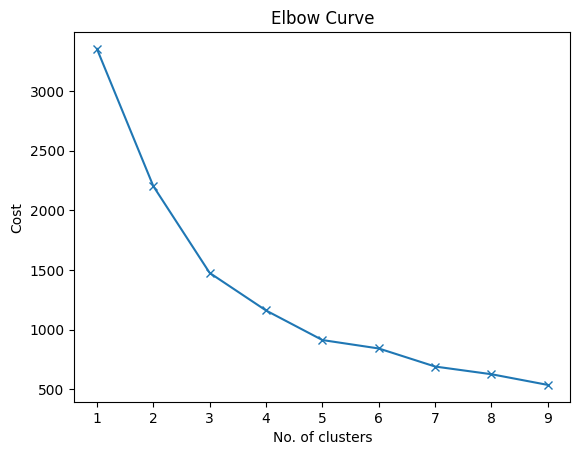

In [69]:
# Elbow curve to find optimal K
# https://predictivehacks.com/k-means-elbow-method-code-for-python/
cost = []
K = range(1,10)
for k in list(K):
	kmeans = KMeans(n_clusters=k, init = "random", n_init = 5, verbose=1)
	kmeans.fit_predict(data)
	cost.append(kmeans.inertia_)
	
plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()

In [70]:
# compute the kmeans clustering with the reduced dimension data and trying 4 clusters
kmeans = KMeans(init="random",n_clusters=4,n_init=10,max_iter=100,random_state=42)
kmeans.fit(data)
labels = kmeans.fit_predict(data)
print(labels)

[0 2 1 ... 2 1 0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


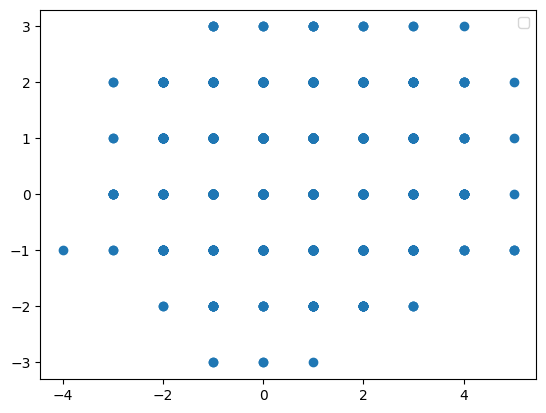

In [291]:
# Visualize the dimension reduced raw data
u_labels = np.unique(labels)
 
plt.scatter(data[:,0] , data[:,1])
plt.legend()
plt.show()

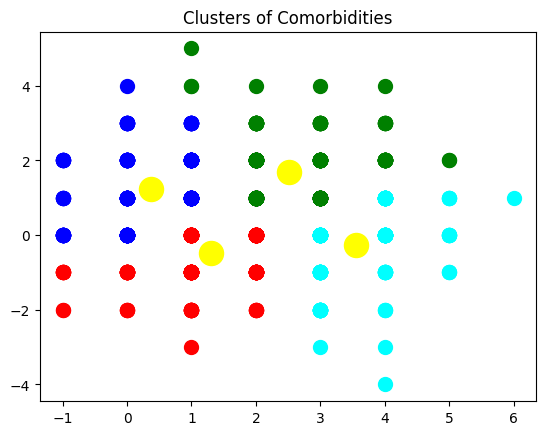

In [73]:
#Visualising the clusters computed with reduced dimension and k means clustering
# each color represents a different cluster and each yellow point the cluster centroid
# https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad
plt.scatter(data[labels==0, 0], data[labels==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(data[labels==1, 0], data[labels==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(data[labels==2, 0], data[labels==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(data[labels==3, 0], data[labels==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(data[labels==4, 0], data[labels==4, 1], s=100, c='magenta', label ='Cluster 5')
#Plot also the centroids but in yellow
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Comorbidities')
plt.show()